In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from math import sqrt
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier # tree algorithm
from sklearn.tree import plot_tree # tree diagram

from sklearn.linear_model import LassoCV
from sklearn.linear_model import  Lasso
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, linear_model

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

# Question 1

# Question 2

Accuracy of the model before pruning (train) is 88%
Accuracy of the model before pruning (test) is 74%


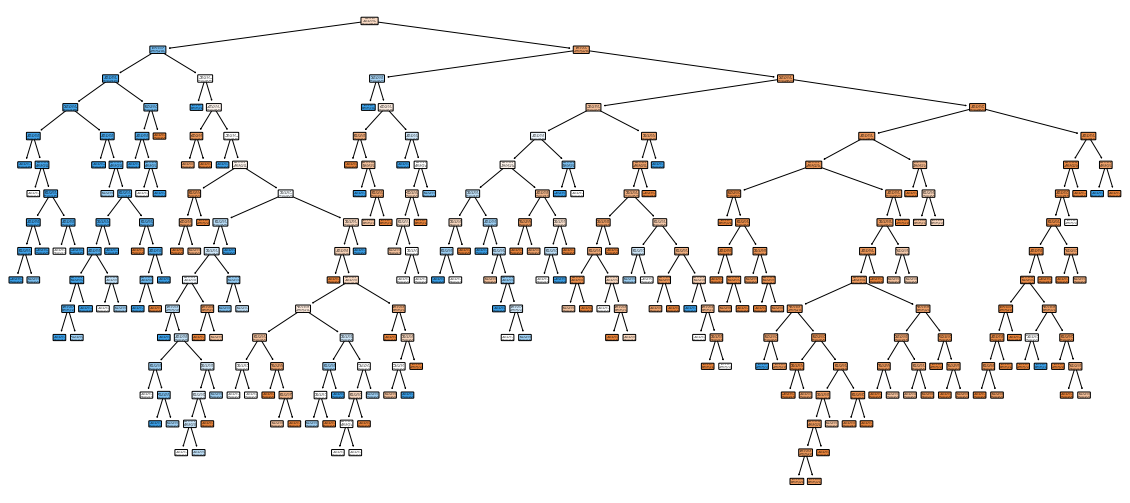

<Figure size 1080x504 with 0 Axes>

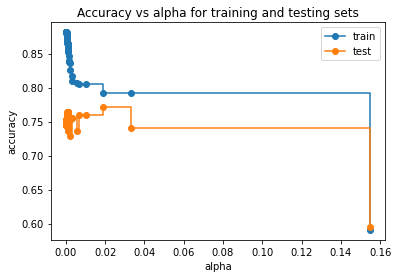

Accuracy of the model after pruning (train) is 79%
Accuracy of the model after pruning (test) is 77%

Optimization terminated successfully.
         Current function value: 0.450039
         Iterations 6
Accuracy of the logistic regression model (train) is 74%
Accuracy of the logistic regression model (test) is 80%


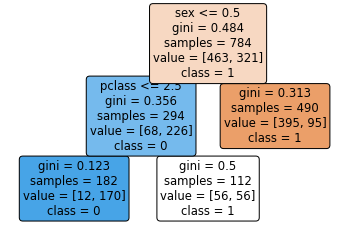

In [2]:
# read csv file and load into pandas dataframe
dfTitanic = pd.read_csv('titanic3.csv')


# choose relevant columns and drop NA values
dfTitanic = dfTitanic[["survived", "sex", "age", "pclass"]].dropna()
dfTitanic = pd.get_dummies(dfTitanic, columns=["sex"], drop_first=True)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(dfTitanic[["sex_male", "age", "pclass"]], dfTitanic[["survived"]],
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
pred_model = model.predict(X_test)

print('Accuracy of the model before pruning (train) is {:.0%}'.format(accuracy_score(y_train, train_pred)))
print('Accuracy of the model before pruning (test) is {:.0%}'.format(accuracy_score(y_test, pred_model)))

# print('RMSE of the model is {:.0%}'.format(sqrt(mean_squared_error(y_test,pred_model))))


feature_names = ["sex", "age", "pclass"]
# target_names = dfTitanic['survived'].unique().tolist()
target_names = ["1", "0"]

plt.figure(figsize=(20, 9))

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)


# path = dtc.cost_complexity_pruning_path(X_train, y_train, random_state=0)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
# print(ccp_alphas)

clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(15, 7))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

model = DecisionTreeClassifier(ccp_alpha = 0.03)
# , max_depth = 4
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
pred_model = model.predict(X_test)

print('Accuracy of the model after pruning (train) is {:.0%}'.format(accuracy_score(y_train, train_pred)))
print('Accuracy of the model after pruning (test) is {:.0%}'.format(accuracy_score(y_test, pred_model)))
# print('RMSE of the model is {:.0%}'.format(sqrt(mean_squared_error(y_test,pred_model))))


plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)


print()
# logistic regression
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# predict using the test values
y_pred_train = model.predict(sm.add_constant(X_train))
y_pred = model.predict(sm.add_constant(X_test))
error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
# print("rmse for model using logistic regression: " + str(sqrt(mean_squared_error(y_test,y_pred))))
# print("rmse for model using logistic regression (train): " + str(sqrt(mean_squared_error(y_train,y_pred_train))))

# print("Accuracy for model using logistic regression: " + str())
# print("Accuracy for model using logistic regression (train): " + str())
print('Accuracy of the logistic regression model (train) is {:.0%}'.format(accuracy_score(y_test,round(y_pred))))
print('Accuracy of the logistic regression model (test) is {:.0%}'.format(accuracy_score(y_train,round(y_pred_train))))

# Question 3

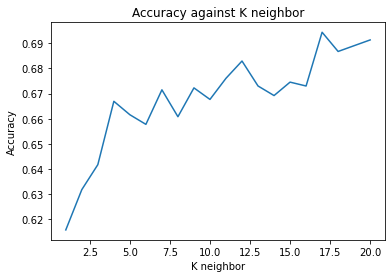

the best K is 16
KNeighborsClassifier(metric='euclidean', n_neighbors=16)
The accuracy of the knn model:  0.7099236641221374

Optimization terminated successfully.
         Current function value: 0.450039
         Iterations 6
accuracy for model using logistic regression: 0.7404580152671756


In [3]:
from sklearn.preprocessing import MinMaxScaler

# read csv file and load into pandas dataframe
dfTitanic = pd.read_csv('titanic3.csv')


# choose relevant columns and drop NA values
dfTitanic = dfTitanic[["survived", "sex", "age", "pclass"]]
dfTitanic["age"] = dfTitanic["age"].fillna(dfTitanic["age"].mean())
dfTitanic = pd.get_dummies(dfTitanic, columns=["sex"], drop_first=True)

# normalize data
min_max=MinMaxScaler()
dfTitanic["pclass"] = min_max.fit_transform(dfTitanic[["pclass"]])
dfTitanic["age"] = min_max.fit_transform(dfTitanic[["age"]])

X = dfTitanic[["sex_male", "age", "pclass"]]
y = dfTitanic[["survived"]]


acc_val = [] #to store rmse values for different k
K_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    acc = cross_val_score(estimator=model,
                                   X=X,
                                   y=y.values.ravel(),
                                   cv=5,
                                   scoring="accuracy").mean()
    K_val.append(K)
    acc_val.append(acc) #store rmse values

plt.plot(K_val, acc_val)
plt.xlabel("K neighbor")
plt.ylabel("Accuracy")
plt.title("Accuracy against K neighbor")
plt.show()

bestK = K_val.index(acc_val.index(max(acc_val)) + 1)
print("the best K is " + str(bestK))
# print(K_val)
# print(acc_val)


model = neighbors.KNeighborsClassifier(n_neighbors=bestK)

gcv = GridSearchCV(estimator=model,param_grid={"metric": ["euclidean", "manhattan", "chebyshev", "minkowski", "hamming", "cosine"]})

gcv.fit(X, y.values.ravel())

model = gcv.best_estimator_
print(model)

model.fit(X_train, y_train.values.ravel())
predicted_value = model.predict(X_test)
print("The accuracy of the knn model: ", accuracy_score(y_test, predicted_value))

print()
# logistic regression
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# predict using the test values
y_pred = model.predict(sm.add_constant(X_test))
#calculate rmse
accuracy = accuracy_score(y_test,round(y_pred)) 
print("accuracy for model using logistic regression: " + str(accuracy))

# Question 4

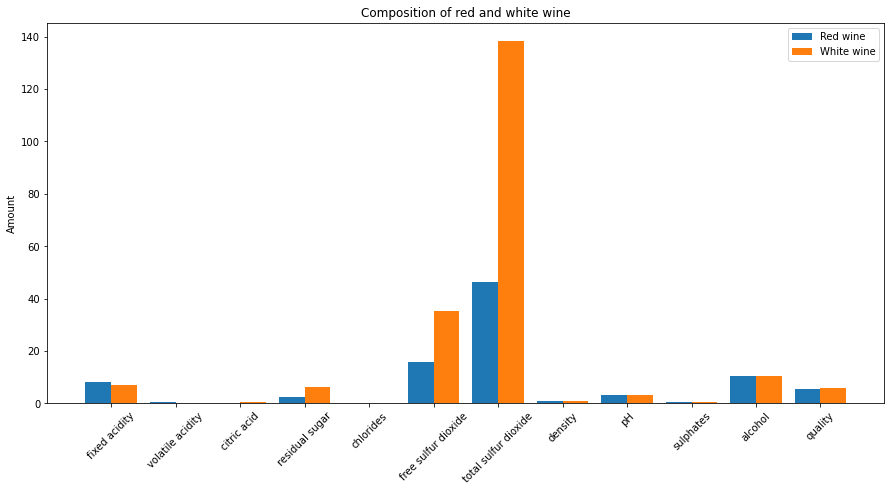

Correlation for Red wine
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Correlation for White wine
fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


C:\Users\Tunga\AppData\Local\Temp\ipykernel_15552\365908819.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = lasso.coef_


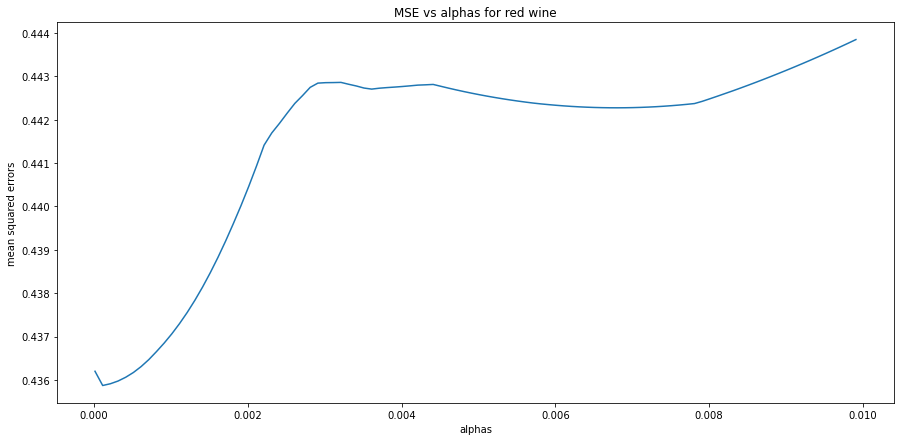

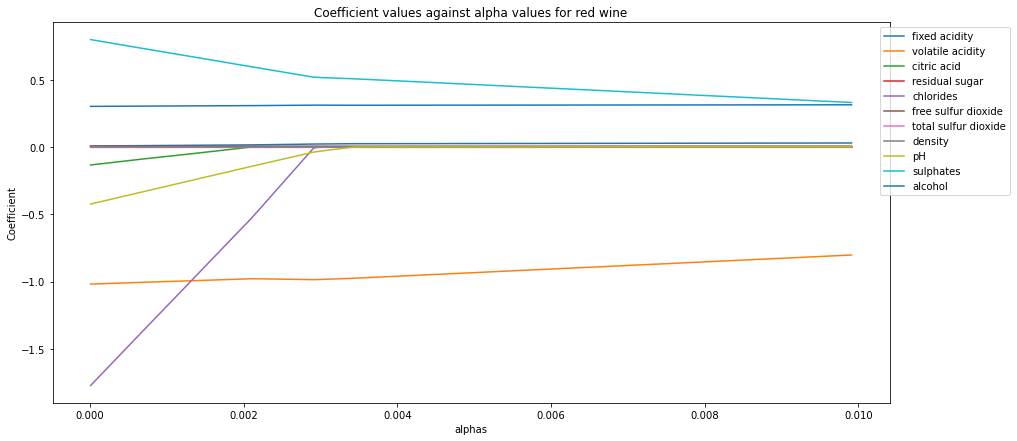

mse of lasso model (red wine): 0.406209344698379
r-squared of lasso model (red wine): 0.34333422428147875
[ 0.02561365 -0.9172699  -0.         -0.00118279 -0.          0.00542362
 -0.00349791 -0.         -0.          0.44667493  0.310629  ]
7
['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


C:\Users\Tunga\AppData\Local\Temp\ipykernel_15552\365908819.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = lasso.coef_


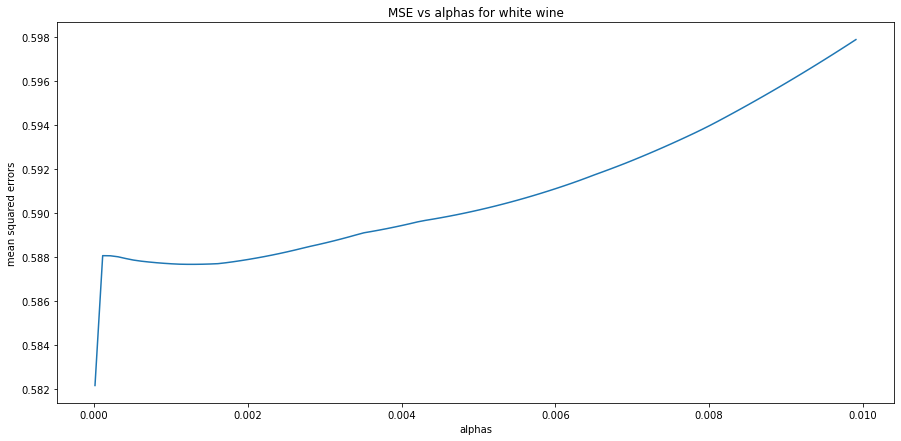

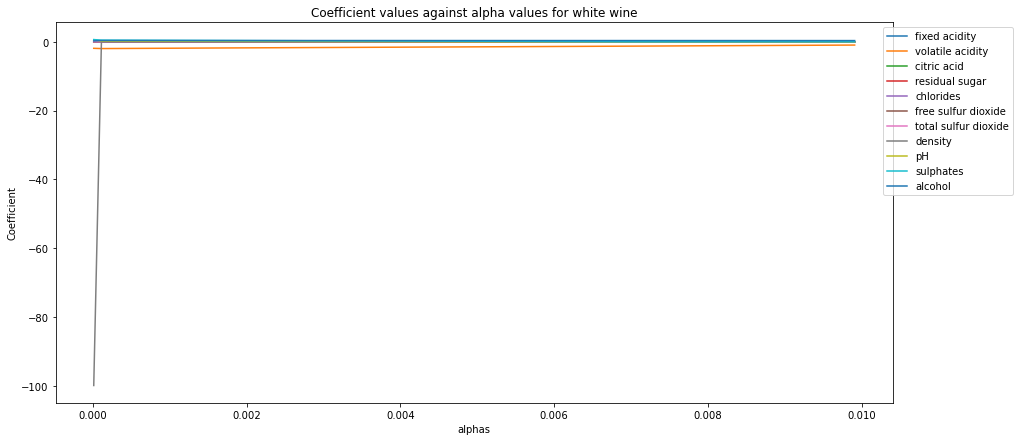

mse of knn model (red wine): 0.537735457063712
r-squared of knn model (red wine): 0.13071307774494656


In [5]:

# read the csv file
dfRedWine = pd.read_csv('winequality-red.csv', sep = ";")
dfWhiteWine = pd.read_csv('winequality-white.csv', sep = ";")


X = dfRedWine.columns.values.tolist()
Yred = dfRedWine.mean().tolist()
Zwhite = dfWhiteWine.mean().tolist()
  
X_axis = np.arange(len(X))
  
# # making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

plt.bar(X_axis - 0.2, Yred, 0.4, label = 'Red wine')
plt.bar(X_axis + 0.2, Zwhite, 0.4, label = 'White wine')
  
plt.xticks(X_axis, X, rotation=45)
plt.ylabel("Amount")
plt.title("Composition of red and white wine")
plt.legend()
plt.show()


print('Correlation for Red wine')
print(dfRedWine.corr()['quality'])
print()
print('Correlation for White wine')
print(dfWhiteWine.corr()['quality'])


def plotGraphs(X, y, X_train, y_train, wineType):
    # MSE and Coefficients for different lambda values.

    df = pd.DataFrame()
    alphas = [0.00001 * i for i in range(1, 1000, 10)]
    mses = []
    # Create a column of feature names
    df['Feature Name'] = X.columns.tolist()
    for a in alphas:
        lasso = Lasso(alpha = a)
        lasso.fit(X_train,y_train)
        mean_mse = cross_val_score(estimator=lasso,
                                   X=X,
                                   y=y,
                                   cv=5,
                                   scoring="neg_mean_squared_error").mean()

        y_pred = lasso.predict(X_test)
        mses.append(-mean_mse)
        column_name = a
        # Create a column of coefficient values
        df[column_name] = lasso.coef_

    plt.figure(figsize=(15, 7))
    plt.plot(alphas, mses)
    plt.xlabel("alphas")
    plt.ylabel("mean squared errors")
    plt.title("MSE vs alphas " + wineType)
    plt.show()    

    plt.figure(figsize=(15, 7))
    for j in range(11):
        plt.plot(df.columns.tolist()[1:],df.iloc[j][1:].tolist(), label=str(df['Feature Name'][j]))

    
    plt.xlabel("alphas")
    plt.ylabel("Coefficient")
    plt.title("Coefficient values against alpha values " + wineType)
    plt.legend(bbox_to_anchor=(1.15, 1))
    plt.show()
    

# for red wine

X = dfRedWine.loc [:, dfRedWine.columns != 'quality']
y = dfRedWine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

plotGraphs(X, y, X_train, y_train, "for red wine")

# Select features using Lasso for red wine

lasso_cv_model = LassoCV().fit(X_train,y_train)


y_pred = lasso_cv_model.predict(X_test)
print("mse of lasso model (red wine): " + str(mean_squared_error(y_test,y_pred)))
print("r-squared of lasso model (red wine): " + str(r2_score(y_test,y_pred)))

print(lasso_cv_model.coef_)
print(np.sum(lasso_cv_model.coef_ != 0))

names = X.columns.tolist()
selectedFeatures = [names[i] for i in range(len(names)) if lasso_cv_model.coef_[i] != 0]
print(selectedFeatures)

# for white wine

X = dfWhiteWine.loc [:, dfWhiteWine.columns != 'quality']
y = dfWhiteWine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

plotGraphs(X, y, X_train, y_train, "for white wine")

# Build KNN regression model for red wine

X = dfRedWine[selectedFeatures]
dfRedWine = dfRedWine[selectedFeatures + ['quality']]
y = dfRedWine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

params = {'n_neighbors':np.arange(2, 100, 1)}

knn = neighbors.KNeighborsRegressor()

knnModel = GridSearchCV(knn, params, cv=5)
knnModel.fit(X_train,y_train)
knnModel.best_params_

y_pred = knnModel.predict(X_test)
print("mse of knn model (red wine): " + str(mean_squared_error(y_test,y_pred)))
print("r-squared of knn model (red wine): " + str(r2_score(y_test,y_pred)))





In [ ]:
# 4.5
# Train the linear regression model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

print("mse of linear regression model (red wine): " + str(mean_squared_error(y_test,y_pred)))
print("r-squared of linear regression model (red wine): " + str(r2_score(y_test,y_pred)))